In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [3]:
class Bandit:
    def __init__(self, p):
    # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.k = 0. # num samples collected so far for the bandit
    def pull(self):
    # draw a 1 with probability p
        return np.random.random() < self.p
    def update(self, R):
        self.k += 1.
        self.p_estimate = ((self.k - 1)*self.p_estimate + R) / self.k

In [6]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

In [ ]:
bandits[1].p

In [4]:
def greedy_epsilon(EPS):
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):
    # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

    # pull the arm for the bandit with the largest sample
        R = bandits[j].pull()

    # update rewards log
        rewards[i] = R

    # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(R)
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

optimal j: 2
mean estimate: 0.19440000000000052
mean estimate: 0.0
mean estimate: 0.0
total reward earned: 1944.0
overall win rate: 0.1944
num_times_explored: 0
num_times_exploited: 10000
num times selected optimal bandit: 0


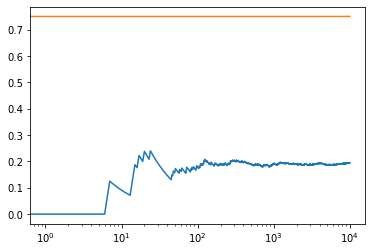

optimal j: 2
mean estimate: 0.19417851271637226
mean estimate: 0.5023255813953491
mean estimate: 0.7482934229060556
total reward earned: 7186.0
overall win rate: 0.7186
num_times_explored: 1068
num_times_exploited: 8932
num times selected optimal bandit: 9229


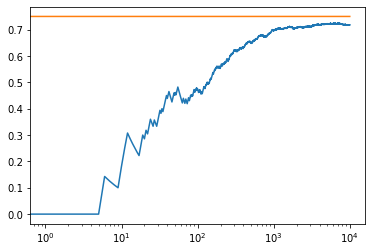

optimal j: 2
mean estimate: 0.1930569430569435
mean estimate: 0.49690328727965644
mean estimate: 0.7502674806469871
total reward earned: 6153.0
overall win rate: 0.6153
num_times_explored: 5022
num_times_exploited: 4978
num times selected optimal bandit: 6660


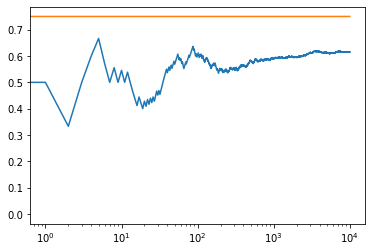

In [7]:
greedy_epsilon(0)
greedy_epsilon(0.1)
greedy_epsilon(0.5)